In [ ]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Tell the time network
## Final model using periodic target function

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

## Setup

In [ ]:
X = np.load('A1_data_150/images.npy')
X = X/255
y = np.load('A1_data_150/labels.npy')

y_min = np.array([i *60 +j for i,j in y])
y_reg = np.array([[np.sin((2*np.pi*i)/720),np.cos((2*np.pi*i)/720)] for i in y_min])

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X,y_reg,test_size=0.1) 

## Model

In [43]:
model = keras.Sequential()
shape = X_reg_train.shape[1:]
input_shape = shape + (1,)

In [ ]:
model.add(layers.Conv2D(filters=16,kernel_size=(5,5),input_shape = input_shape))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=32, kernel_size=(5,5)))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.08))

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.08))

model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.08))

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.08))

model.add(layers.Dense(2, activation="linear"))

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss="mse", metrics=["mae"])

In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 146, 146, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 73, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 69, 69, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 67, 67, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 33, 33, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,673,826 (25.46 MB)

 Trainable params: 6,673,698 (25.46 MB)

 Non-trainable params: 128 (512.00 B)

In [47]:
hist = model.fit(
    X_reg_train,y_reg_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32
)

Epoch 1/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.6250 - mae: 0.6641 - val_loss: 0.5338 - val_mae: 0.6464
Epoch 2/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4731 - mae: 0.6096 - val_loss: 0.5908 - val_mae: 0.6593
Epoch 3/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3510 - mae: 0.4998 - val_loss: 0.3142 - val_mae: 0.4775
Epoch 4/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2734 - mae: 0.4301 - val_loss: 0.5631 - val_mae: 0.6247
Epoch 5/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1919 - mae: 0.3495 - val_loss: 0.5184 - val_mae: 0.5937
Epoch 6/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1284 - mae: 0.2790 - val_loss: 0.1311 - val_mae: 0.2663
Epoch 7/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1012 - mae: 0.2471 - val_loss: 0.2451 - val_mae: 0.3940
Epoch 8/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0847 - mae: 0.2242 - val_loss: 0.1705 - val_mae: 0.3332
Epoch 9/100
456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 8m

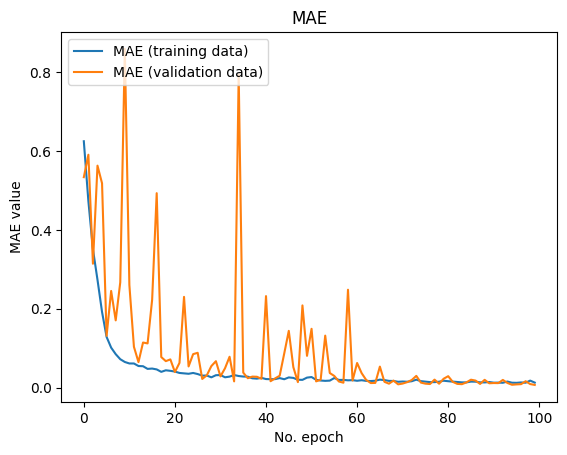

In [48]:
import matplotlib.pyplot as plt

# Plot history: MAE
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [49]:
def decode_target_vals(y):
    angles_pred = np.arctan2(y[:, 0], y[:, 1])
    decoded = (angles_pred / (2 * np.pi)) * 720
    return (decoded+720)%720

y_reg_pred = model.predict(X_reg_test)
# y_reg_test = decode_target_vals(y_reg_test)
y_reg_pred = decode_target_vals(y_reg_pred)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [50]:
error = np.abs(y_reg_pred - y_reg_test)
error = np.minimum(error, 720 - error)
mae = np.mean(error)
print("Mean Absolute Error (in minutes):", mae)

Mean Absolute Error (in minutes): 9.870581783718535
